In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

In [4]:
netflix_movies = pd.read_csv("./Downloads/netflix_titles.csv")

In [25]:
netflix_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# How many and which variables have null values?

In [8]:
netflix_movies.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
netflix_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
netflix_movies.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# Director, Country and Cast column have null values and remaining are looking complete

<AxesSubplot:>

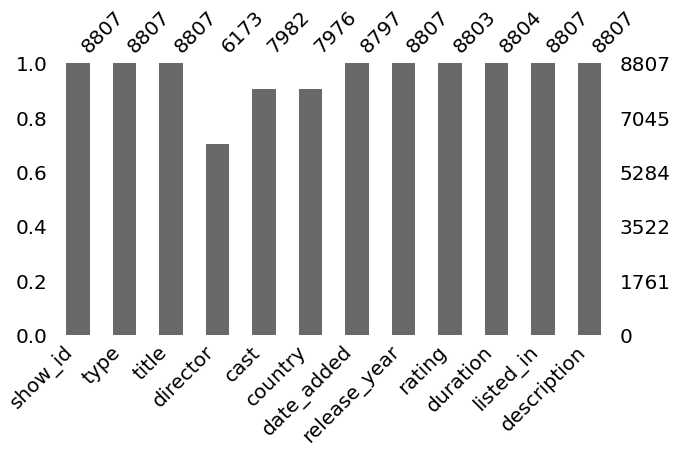

In [23]:
msno.bar(netflix_movies, figsize=(10,5), fontsize=20)

<AxesSubplot:>

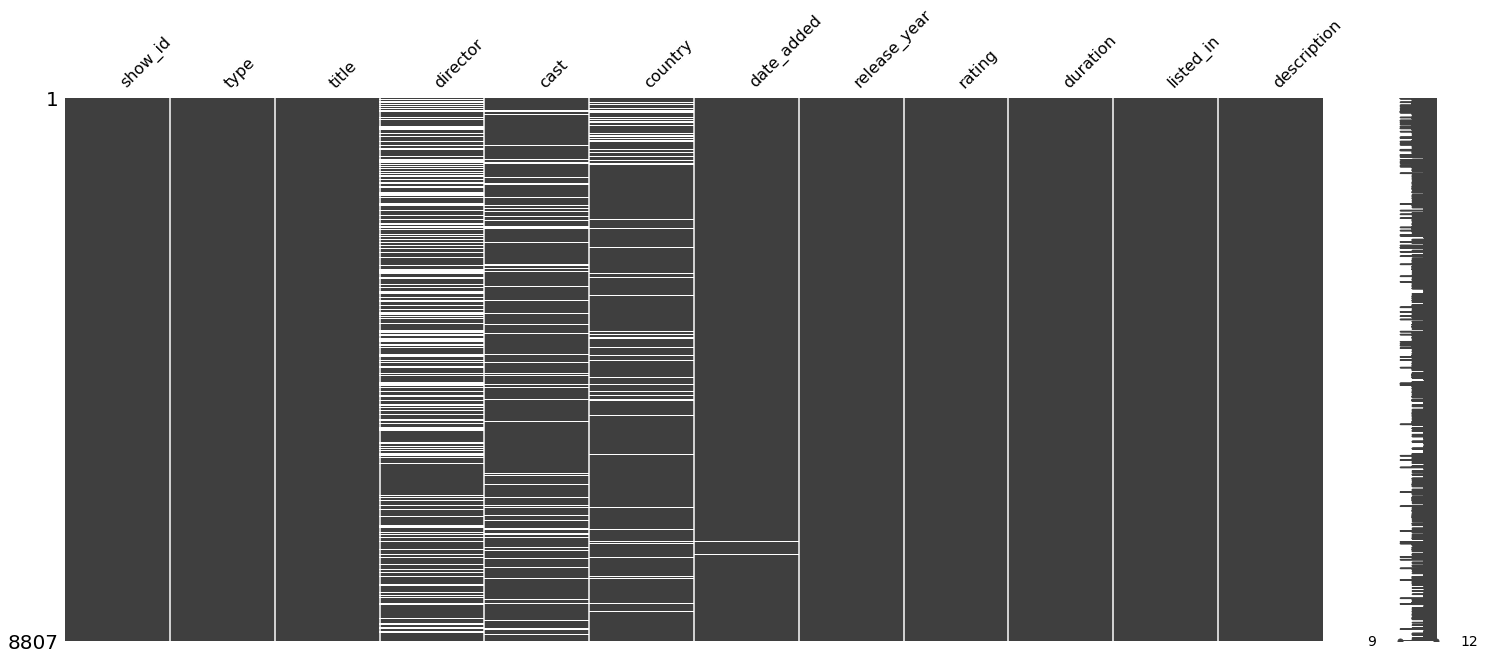

In [13]:
msno.matrix(netflix_movies)

# Are there more movies or shows on netflix?

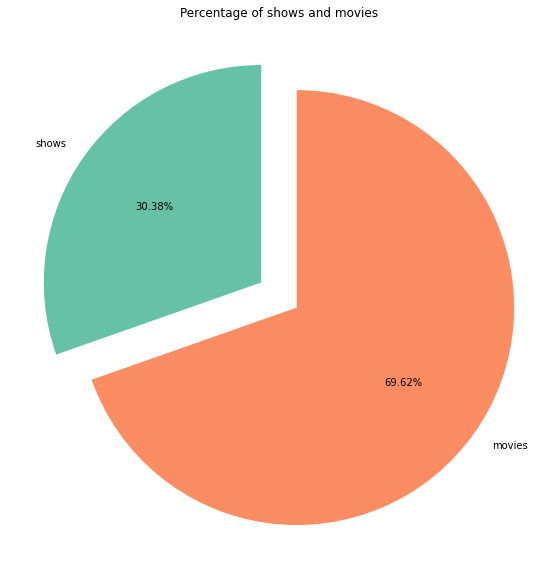

In [74]:
colors = sns.color_palette("Set2")
labels = ["shows", "movies"]
plt.figure(figsize=(10,10))
plt.pie(netflix_movies["type"].value_counts().sort_values(), colors = colors, labels=labels, autopct= "%.2f%%", startangle=90, explode=[0.1,0.1])
plt.title("Percentage of shows and movies")
plt.show()

# 2018 has most number of released shows

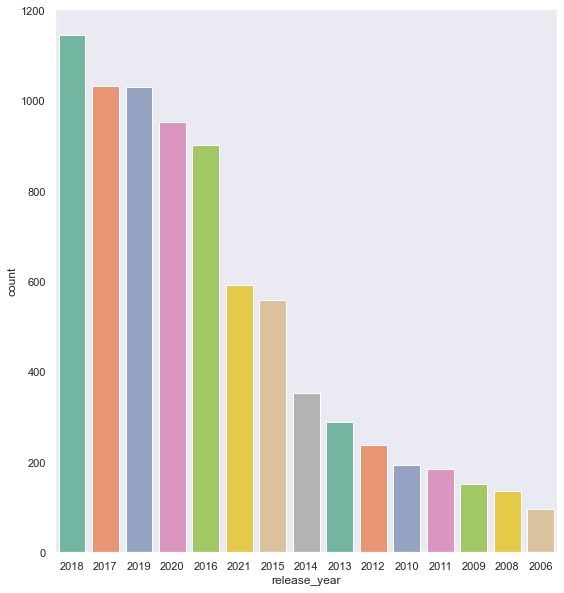

In [19]:
plt.figure(figsize=(9,10))
sns.set(style="dark")
ax = sns.countplot(x="release_year", data=netflix_movies, palette="Set2", order=netflix_movies['release_year'].value_counts().index[0:15])

# After 2018 netflix reduced making of its movies and increased its shows. Why?

<AxesSubplot:xlabel='release_year'>

<Figure size 1440x720 with 0 Axes>

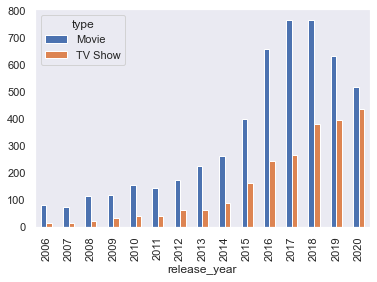

In [23]:
plt.figure(figsize=(20,10))
stacked_bar_plot = netflix_movies.groupby(['type', 'release_year']).size().reset_index().pivot(columns='type', index='release_year', values=0)[-16:-1]
stacked_bar_plot.plot(kind='bar')

# Which Directors have done most movies together?

<AxesSubplot:xlabel='director,director'>

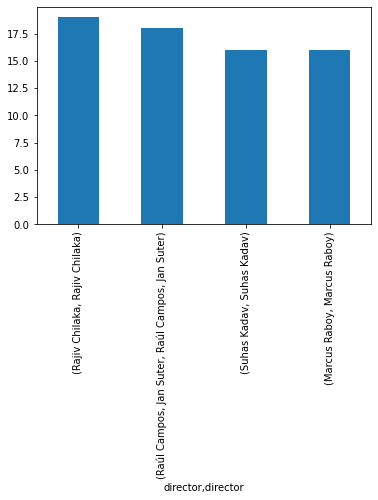

In [5]:
netflix_movies.groupby("director")["director"].value_counts().sort_values(ascending=False)[0:4].plot(kind="bar")